# Open Classrooms - Project 4

## Analysis Notebook - Pierre Schifflers

# Objectives
Based on 2015 and 2016 data:
- Predict CO2 Emissions of buildings in Seattle
- Predict total energy consumption of buildings in Seattle
- Evaluate benefit of using Energy Star Score in predictions

Data source: https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking <br>
Assignment page: https://openclassrooms.com/fr/projects/629/assignment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Set up environment
pd.set_option('display.max_columns', 50)
plt.rcParams['figure.figsize'] = [14, 6]

In [3]:
#Import data
data_final = pd.read_csv('data_final_20200411.csv', na_filter = False)
data_final_en = pd.read_csv('data_final_en_20200411.csv', na_filter = False) #File with Energy Star Score

In [4]:
#Remove unnecessary column added during CSV export
data_final.drop(columns = 'Unnamed: 0', inplace = True)
data_final_en.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
#Features
X = data_final.drop(columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])
X_en = data_final_en.drop(columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']) #Features with Energy Star Score

In [6]:
#Create Target variables
y = data_final['SiteEnergyUse(kBtu)']
y2 = data_final['TotalGHGEmissions']

#Create Target variables without Energy Score
y_en = data_final_en['SiteEnergyUse(kBtu)']
y2_en = data_final_en['TotalGHGEmissions']

## Feature Engineering

In [7]:
#Make lists of categorical and numerical columns for separate treatment
categorical_cols = X.columns[X.dtypes==object]
numerical_cols = X.select_dtypes(exclude='object').columns

### One-Hot Encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore') #Create encoder
encoding = enc.fit_transform(X[categorical_cols]) #Create a data frame with the one-hot encoded values
encoding = encoding.toarray() #Transform the information in the fitted object to an array
enc_df = pd.DataFrame(encoding, columns = enc.get_feature_names()) #Make data frame with one-hot encoded info
X = X[numerical_cols].join(enc_df) #Re-attach it to the numerical columns

### Standard Scaler

In [9]:
#Scaling the numerical data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [10]:
X

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Latitude,Longitude,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_Nonresidential WA,x0_SPS-District K-12,x1_Educational,x1_Health,x1_Hotel,x1_Industrial,...,x4_Educational,x4_Health,x4_Hotel,x4_Industrial,x4_No Use,x4_Office,x4_Other,x4_Parking,x4_Religious,x4_Residential,x4_Social,x5_Educational,x5_Health,x5_Hotel,x5_Industrial,x5_No Use,x5_Office,x5_Other,x5_Parking,x5_Religious,x5_Residential,x5_Social,x6_HIGH OUTLIER,x6_LOW OUTLIER,x6_NA
0,-1.002851,1.202776,-1.243565,-0.055026,1.400463,-0.023509,-0.281326,0.029712,0.068248,-0.346953,-0.165953,-0.247100,-0.114220,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-1.002851,1.202776,0.844044,-0.055026,1.209376,0.057253,0.162544,0.030105,0.040964,0.039913,0.227835,-0.227942,0.056809,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-1.002851,1.202776,0.027154,-0.055026,6.941981,4.638781,-0.281326,5.076559,4.075264,2.221192,-0.165953,-0.222854,-0.103236,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.002851,1.202776,-1.273820,-0.055026,1.018290,-0.168220,-0.281326,-0.126935,-0.094200,-0.346953,-0.165953,-0.204715,-0.063037,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.002851,1.202776,0.359961,-0.055026,2.546984,0.144376,0.085816,0.139459,0.278008,1.399617,-0.165953,-0.214371,-0.222087,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6668,0.997157,-1.151202,0.662513,-0.055026,-0.701492,-0.429879,-0.281326,-0.410176,-0.387928,-0.346953,-0.165953,-1.188088,0.861017,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6669,0.997157,-1.151202,1.086086,-0.055026,-0.701492,-0.410099,-0.281326,-0.388765,-0.365724,-0.346953,-0.165953,-0.580645,0.444861,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6670,0.997157,1.202776,0.178430,-0.055026,-0.701492,-0.425273,-0.281326,-0.405190,-0.416153,-0.203804,-0.165953,0.260318,-0.845628,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
6671,0.997157,-1.621998,0.632258,-0.055026,-0.701492,-0.420235,-0.281326,-0.399737,-0.422036,-0.179997,-0.124717,-2.002058,0.390307,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Transforming the Target Variable

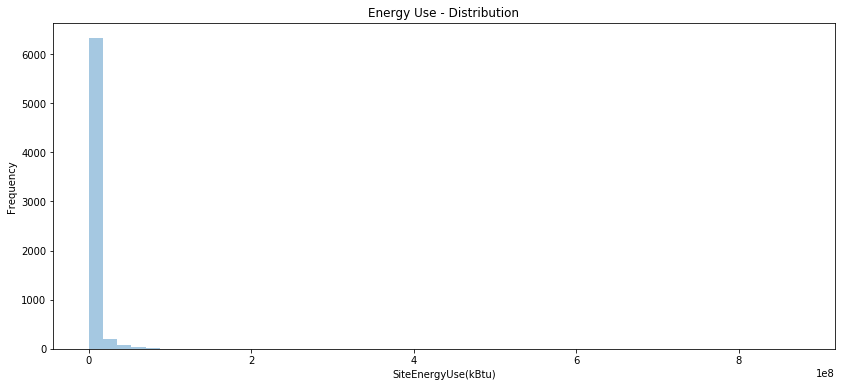

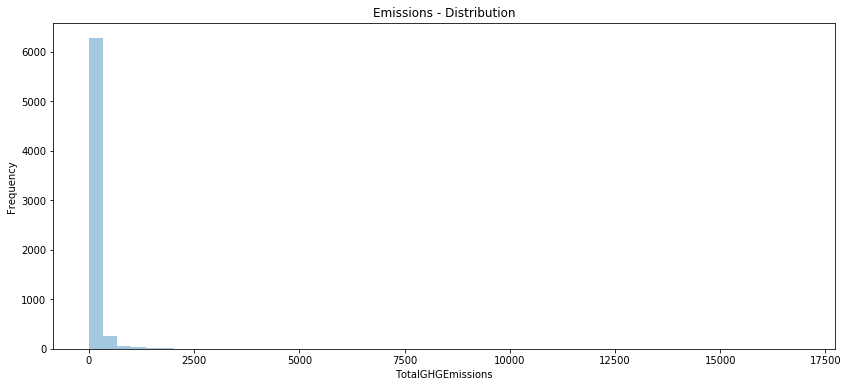

In [11]:
#Visualize distribution of two target variables
sns.distplot(y, kde = False)
plt.title('Energy Use - Distribution')
plt.ylabel('Frequency')
plt.show()
sns.distplot(y2 , kde = False)
plt.title('Emissions - Distribution')
plt.ylabel('Frequency')
plt.show()

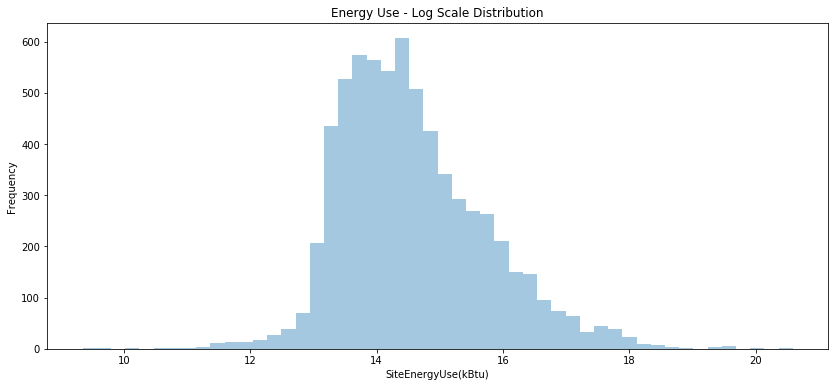

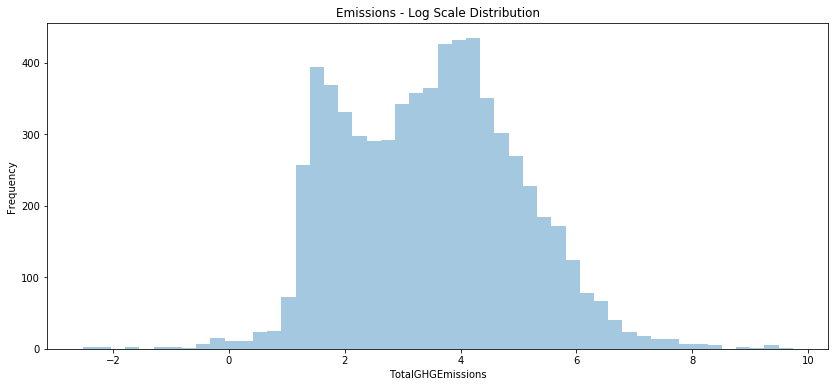

In [12]:
#As this is a very skewed distribution, we can make an alternate target variable where the distribution is more normal

y_log = np.log(y)
y2_log = np.log(y2)
sns.distplot(y_log, kde = False)
plt.title('Energy Use - Log Scale Distribution')
plt.ylabel('Frequency')
plt.show()
sns.distplot(y2_log, kde = False)
plt.title('Emissions - Log Scale Distribution')
plt.ylabel('Frequency')
plt.show()

This distribution already looks a lot better to work with, let's test and see if we get better results with the standardized distribution

Testing basic results with a Random Forest Regressor with both target variables

### Standard Target Variable

In [13]:
from sklearn.model_selection import train_test_split

#Creating training and test datasets for Target Variable 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Variable 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state = 42)

In [14]:
#Testing a fit of the Random Forest Regressor with default hyperparameters
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
model = rfr.fit(X_train, y_train)
pred = model.predict(X_test)
model2 = rfr.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)

R-Squared: 0.88
Mean Absolute Error: 1433546.15


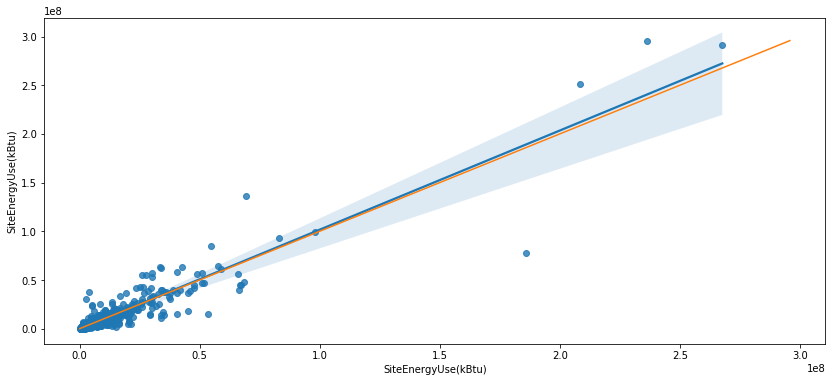

R-Squared: 0.79
Mean Absolute Error: 48.29


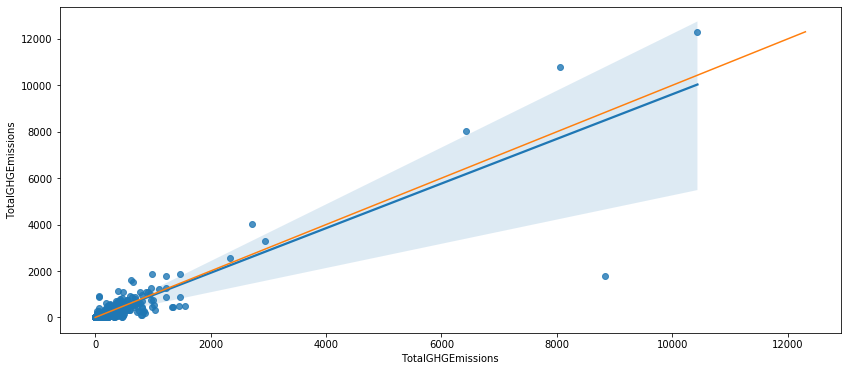

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Variable 1
sns.regplot(pred, y_test)
sns.lineplot(y_test, y_test)
print(f"R-Squared: {round(r2_score(y_test, pred),2)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, pred),2)}")
plt.show()

#Variable 2
sns.regplot(pred2, y2_test)
sns.lineplot(y2_test, y2_test)
print(f"R-Squared: {round(r2_score(y2_test, pred2),2)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y2_test, pred2),2)}")
plt.show()

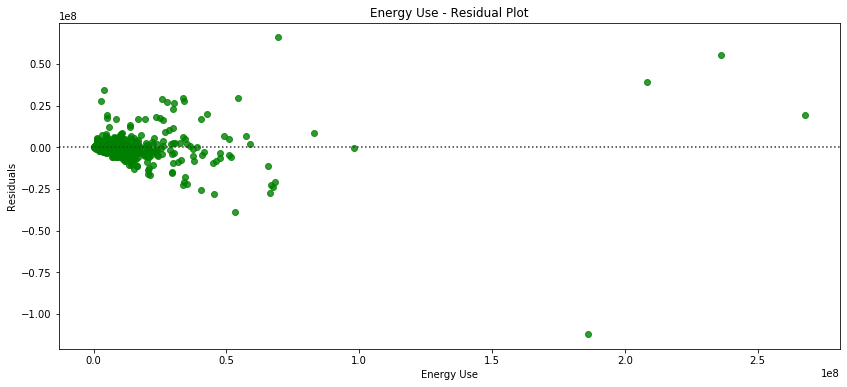

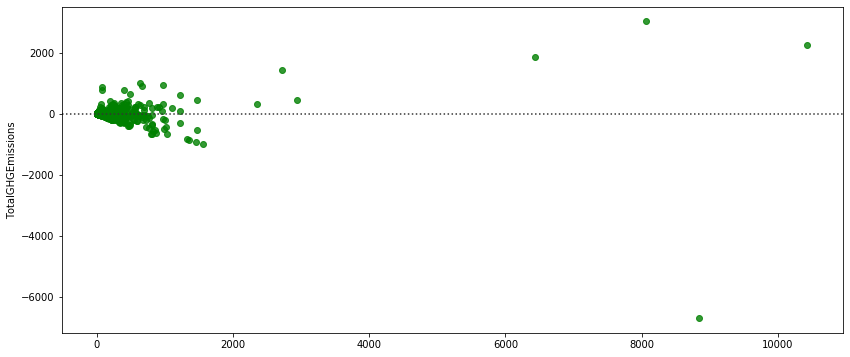

In [16]:
#Plot Residuals
sns.residplot(pred, y_test, color="g")
plt.title("Energy Use - Residual Plot")
plt.xlabel("Energy Use")
plt.ylabel("Residuals")
plt.show()

sns.residplot(pred2,y2_test, color="g")
plt.show()

### Normalized Target Variable

In [17]:
#Creating training and test datasets for Log of Target Variable 1
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state = 42)

# Log of Variable 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2_log, test_size=0.3, random_state = 42)

In [18]:
#RFR
rfr = RandomForestRegressor()
model = rfr.fit(X_train, y_train)
pred = model.predict(X_test)
model2 = rfr.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)

R-Squared: 0.87
Mean Absolute Error: 0.26


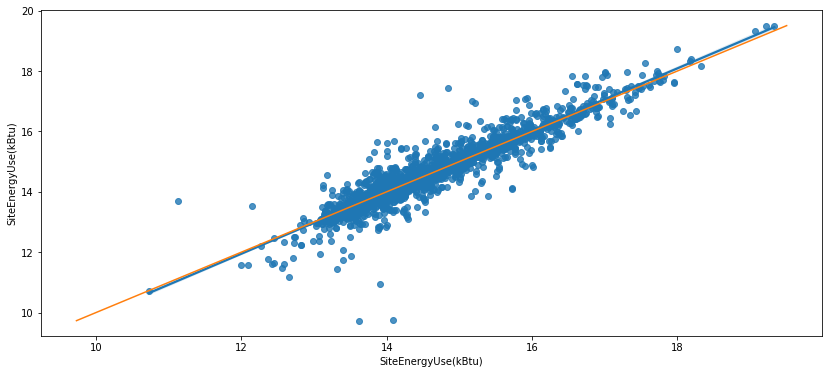

R-Squared: 0.79
Mean Absolute Error: 0.47


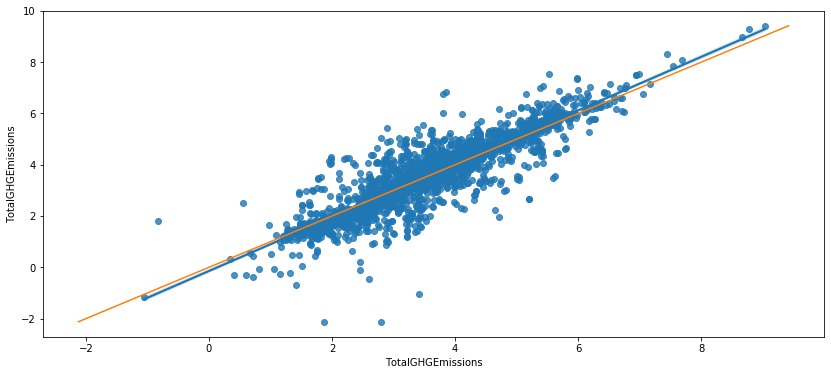

In [19]:
#Variable 1
sns.regplot(pred, y_test)
sns.lineplot(y_test, y_test)
print(f"R-Squared: {round(r2_score(y_test, pred),2)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, pred),2)}")
plt.show()

#Variable 2
sns.regplot(pred2, y2_test)
sns.lineplot(y2_test, y2_test)
print(f"R-Squared: {round(r2_score(y2_test, pred2),2)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y2_test, pred2),2)}")
plt.show()

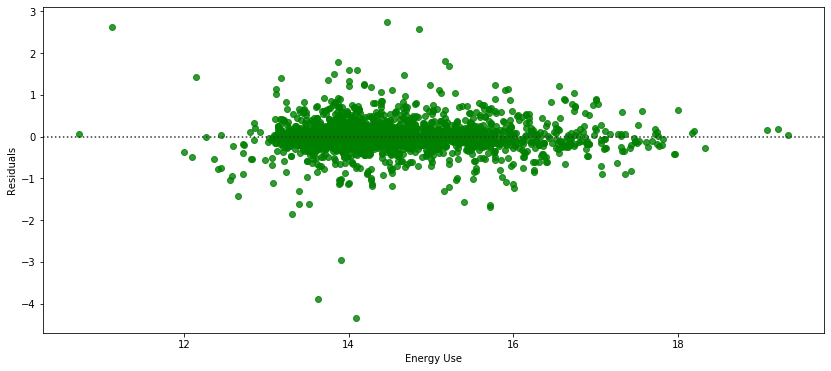

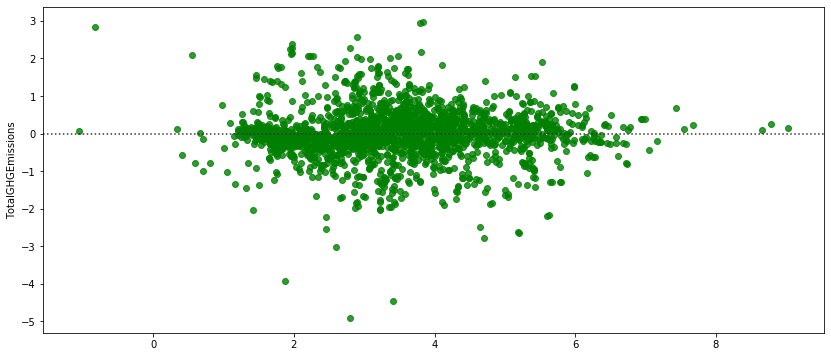

In [20]:
#Plot Residuals
sns.residplot(pred, y_test, color="g")
plt.xlabel("Energy Use")
plt.ylabel("Residuals")
plt.show()

sns.residplot(pred2,y2_test, color="g")
plt.show()

<b>Conclusion:</b> On the R-Squared score, there is no real difference from using the log-transformed variable, however, seeing as the data and residuals are more evenly distributed (especially for the Emissions), we will use the log-transformed variables.

# Models

In [21]:
# Define a dataframe to store the results of our different models

results = pd.DataFrame(columns = ['Variable','Model', 'Hyperparameters', 'R-Squared', 'MAE', 'RMSE'])

## Naive Methods

In [22]:
#Use the mean value of the training data 
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")

#Variable 1
naive_model1 = dummy_regr.fit(X_train, y_train)
pred = dummy_regr.predict(X_test)

#Variable 2 
naive_model2 = dummy_regr.fit(X2_train, y2_train)
pred2 = dummy_regr.predict(X2_test)

In [23]:
#Model information
model_name = "Naive Method - Mean"
hyperparameter = "Default"

#Variable 1 results
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2 results
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,2)} \nMAE: {round(mae,2)}\nRMSE: {round(rmse,2)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,2)} \nMAE: {round(mae_2,2)}\nRMSE: {round(rmse_2,2)}")

#Append results to Results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name,
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Naive Method - Mean: Energy Use 
R-Squared: -0.0 
MAE: 0.9
RMSE: 1.15

Naive Method - Mean: Emissions 
R-Squared: -0.0 
MAE: 1.23
RMSE: 1.5


## Ensemble Methods

### Random Forest Regressor

In [24]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

rfr = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [25]:
#Default Hyperparameters
rfr = RandomForestRegressor(random_state = 42)
model = rfr.fit(X_train, y_train)
pred = model.predict(X_test)
model2 = rfr.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)

In [26]:
#Default Hyperparameters results
model_name = "Random Forest Regressor"
hyperparameter = "Default"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Random Forest Regressor: Energy Use 
R-Squared: 0.875 
MAE: 0.256
RMSE: 0.407

Random Forest Regressor: Emissions 
R-Squared: 0.791 
MAE: 0.475
RMSE: 0.687


In [27]:
#Cross-Validated Grid Search
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state = 42)

parameters = {
    'n_estimators': [100,300,500], #Number of trees in the forest
    'min_samples_leaf' : [1,3,5], #Minimum number of samples that a leaf can have after splitting.
    'max_features': ['auto', 'sqrt'] #Max number of features provided to each tree
    #Did not look at other parameters because they were either based on performance gain or did not provide much improvements in the model
}

rfr_search = GridSearchCV(estimator = rfr,
                        param_grid = parameters,
                        cv = 5,
                        verbose = 3,
                        n_jobs = -1
                       )

#Variable 1
rfr_search.fit(X_train, y_train)
pred = rfr_search.predict(X_test)
print(rfr_search.best_params_)

#Variable 2
rfr_search.fit(X2_train, y2_train)
pred2 = rfr_search.predict(X2_test)
print(rfr_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.2min finished


{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}


In [28]:
#Model information
model_name = "Random Forest Regressor"
hyperparameter = "Grid Search"

#Variable 1 results
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2 results
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Append results to Results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Random Forest Regressor: Energy Use 
R-Squared: 0.873 
MAE: 0.267
RMSE: 0.411

Random Forest Regressor: Emissions 
R-Squared: 0.792 
MAE: 0.473
RMSE: 0.685


In [79]:
#Returning the importance of the different features
coefficients = abs(rfr_search.best_estimator_.feature_importances_)

In [80]:
#Linking the different features with their level of importance

important_features = pd.concat([pd.DataFrame(X.columns, columns = ['Variable']),pd.DataFrame(coefficients, columns = ['Coefficient'])],axis = 1).sort_values(by = 'Coefficient', ascending = False)

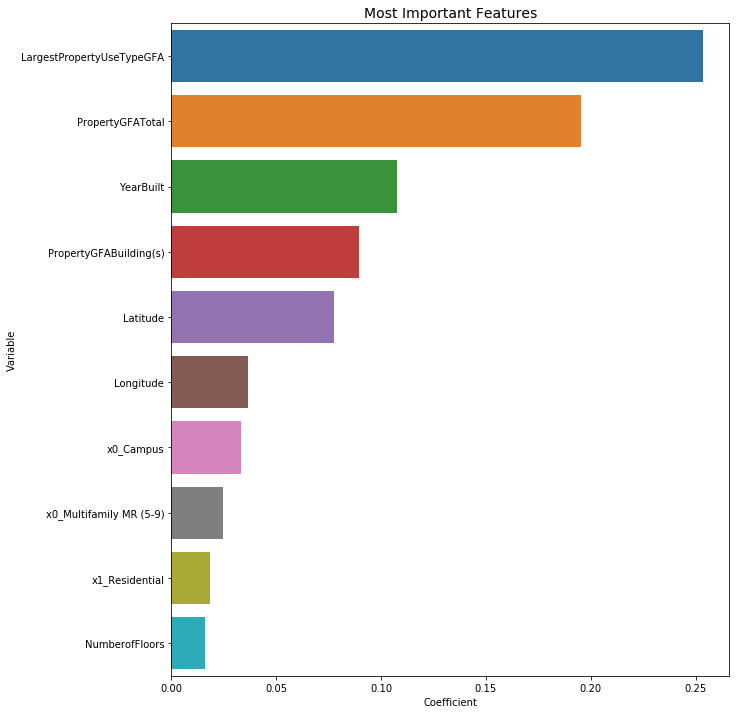

In [81]:
#Displaying the importance of the different features
fig, ax = plt.subplots(figsize = (10,12))
sns.barplot(y = 'Variable', x = 'Coefficient', data = important_features.head(10))
plt.title("Most Important Features", fontsize = 14)
plt.show()

### Gradient Boost Regressor

In [32]:
#See default parameters used in GBR
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
print('Parameters currently in use:\n')
pprint(gbr.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [33]:
#Default Hyperparameters
gbr = GradientBoostingRegressor(random_state = 42)
model = gbr.fit(X_train, y_train)
pred = model.predict(X_test)
model2 = gbr.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)

In [34]:
#Default Hyperparameters results
model_name = "Gradient Boosting Regressor"
hyperparameter = "Default"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Append results to results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Gradient Boosting Regressor: Energy Use 
R-Squared: 0.81 
MAE: 0.357
RMSE: 0.503

Gradient Boosting Regressor: Emissions 
R-Squared: 0.662 
MAE: 0.684
RMSE: 0.873


In [35]:
#Cross-Validated Grid Search
gbr = GradientBoostingRegressor(random_state = 42)

parameters = {
    'n_estimators': [500,1000], #Number of trees in the forest
    'learning_rate': [0.1,0.2,0.3], #Learning Rate
    'min_samples_leaf' : [1,3,5] #Minimum number of samples that a leaf can have after splitting.
}

gbr_search = GridSearchCV(estimator = gbr,
                        param_grid = parameters,
                        cv = 5,
                        verbose = 2,
                        n_jobs = -1
                       )

#Variable 1
gbr_search.fit(X_train, y_train)
pred = gbr_search.predict(X_test)
print(gbr_search.best_params_)

#Variable 2
gbr_search.fit(X2_train, y2_train)
pred2 = gbr_search.predict(X2_test)
print(gbr_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.9min finished


{'learning_rate': 0.3, 'min_samples_leaf': 5, 'n_estimators': 1000}
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.8min finished


{'learning_rate': 0.2, 'min_samples_leaf': 1, 'n_estimators': 1000}


In [36]:
#GridSearch Hyperparameters results
model_name = "Gradient Boosting Regressor"
hyperparameter = "Grid Search"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Appending results to results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Gradient Boosting Regressor: Energy Use 
R-Squared: 0.872 
MAE: 0.267
RMSE: 0.413

Gradient Boosting Regressor: Emissions 
R-Squared: 0.77 
MAE: 0.518
RMSE: 0.721


In [37]:
#Returning the importance of the different features
coefficients = abs(gbr_search.best_estimator_.feature_importances_)

In [38]:
#Linking the different features with their importance

important_features = pd.concat([pd.DataFrame(X.columns, columns = ['Variable']),pd.DataFrame(coefficients, columns = ['Coefficient'])],axis = 1).sort_values(by = 'Coefficient', ascending = False)

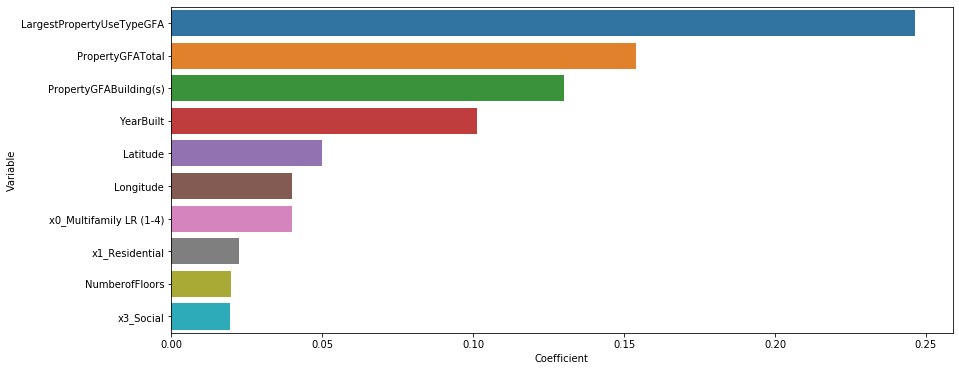

In [39]:
#Displaying the importance of the different features
sns.barplot(y = 'Variable', x = 'Coefficient', data = important_features.head(10));

## Nearest Neighbours

### KNN Regression

In [40]:
#Checking default parameters
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
print('Parameters currently in use:\n')
pprint(knr.get_params())

Parameters currently in use:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


In [41]:
#Default Hyperparameters
knr = KNeighborsRegressor()
model = knr.fit(X_train, y_train)
pred = model.predict(X_test)
model2 = knr.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)

In [42]:
#Default Hyperparameters results
model_name = "KNN Regressor"
hyperparameter = "Default"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Appending results to Results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

KNN Regressor: Energy Use 
R-Squared: 0.618 
MAE: 0.518
RMSE: 0.712

KNN Regressor: Emissions 
R-Squared: 0.449 
MAE: 0.855
RMSE: 1.115


In [43]:
#Cross-Validated Grid Search
knr = KNeighborsRegressor()

parameters = {
    'n_neighbors' : [3,5,7,9,11,13], # Number of Neighbours to take into consideration
    'weights' : ['uniform', 'distance'], #Method to attribute weights to points in the neighbourhood
    'p': [1,2] #Manhattan distance (1) vs Euclidian distance(2)
    
}

knr_search = GridSearchCV(estimator = knr,
                        param_grid = parameters,
                        cv = 5,
                        verbose = 2,
                          n_jobs = -1
                       )

#Variable 1
knr_search.fit(X_train, y_train)
pred = knr_search.predict(X_test)
print(knr_search.best_params_)

#Variable 2
knr_search.fit(X2_train, y2_train)
pred2 = knr_search.predict(X2_test)
print(knr_search.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   12.8s finished


{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   11.7s finished


{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [44]:
#Results for Grid Search
model_name = "KNN Regressor"
hyperparameter = "Grid Search"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Appending results to Results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

KNN Regressor: Energy Use 
R-Squared: 0.721 
MAE: 0.438
RMSE: 0.609

KNN Regressor: Emissions 
R-Squared: 0.568 
MAE: 0.743
RMSE: 0.988


## Support Vector Machines

### Support Vector Regression

In [45]:
#Check default parameters
from sklearn.svm import SVR

svr = SVR()
print('Parameters currently in use:\n')
pprint(svr.get_params())

Parameters currently in use:

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


In [46]:
#Default Hyperparameters
svr = SVR()
model = svr.fit(X_train, y_train)
pred = model.predict(X_test)
model2 = svr.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)

In [47]:
#Default Hyperparameters results
model_name = "Support Vector Regression"
hyperparameter = "Default"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Support Vector Regression: Energy Use 
R-Squared: 0.78 
MAE: 0.372
RMSE: 0.54

Support Vector Regression: Emissions 
R-Squared: 0.602 
MAE: 0.703
RMSE: 0.948


In [48]:
#Cross-Validated Grid Search
svr = SVR()

parameters = {#'kernel' : ['rbf'],
              'C' : [1,10,100,1000],
              'gamma': [0.001, 0.01, 0.1]
                #Initial results showed better performance around C: 10 and gamma: 0.01 so investigating these mid values
                #Performance was poor and slow with polynomial kernel so excluding it from grid search
              
}

svr_search = GridSearchCV(estimator = svr,
                        param_grid = parameters,
                        cv = 5,
                        verbose = 10,
                        n_jobs = -1
                       )

# Variable 1
svr_search.fit(X_train, y_train)
pred = svr_search.predict(X_test)
print(svr_search.best_params_)

# Variable 2
svr_search.fit(X2_train, y2_train)
pred2 = svr_search.predict(X2_test)
print(svr_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done  56 out of  60 | elapsed:   54.2s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


{'C': 100, 'gamma': 0.01}
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  49 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  56 out of  60 | elapsed:   47.9s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.1min finished


{'C': 100, 'gamma': 0.01}


In [49]:
#Results
model_name = "Support Vector Regression"
hyperparameter = "Grid Search"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Appending results to Results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Support Vector Regression: Energy Use 
R-Squared: 0.796 
MAE: 0.359
RMSE: 0.521

Support Vector Regression: Emissions 
R-Squared: 0.612 
MAE: 0.685
RMSE: 0.936


## Linear Models

### Elastic Net Regression

In [50]:
#Checking default hyperparameters
from sklearn.linear_model import ElasticNet

enr = ElasticNet()
print('Parameters currently in use:\n')
pprint(enr.get_params())

Parameters currently in use:

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


In [51]:
#Default Hyperparameters
enr = ElasticNet()
model = enr.fit(X_train, y_train)
pred = model.predict(X_test)
model2 = enr.fit(X2_train, y2_train)
pred2 = model2.predict(X2_test)

In [52]:
#Default Hyperparameters results
model_name = "Elastic Net Regression"
hyperparameter = "Default"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Elastic Net Regression: Energy Use 
R-Squared: 0.081 
MAE: 0.868
RMSE: 1.105

Elastic Net Regression: Emissions 
R-Squared: 0.053 
MAE: 1.2
RMSE: 1.462


In [53]:
#Cross-Validated Grid Search
enr = ElasticNet()

parameters = {
    'l1_ratio' : np.linspace(0, 1, num = 11), #
    'alpha' : [0.0001, 0.001, 0.01, 1, 10, 100, 1000]
    
}

enr_search = GridSearchCV(estimator = enr,
                        param_grid = parameters,
                        cv = 5,
                        verbose = 2,
                        n_jobs = -1
                       )

#Variable 1
enr_model1 = enr_search.fit(X_train, y_train)
pred = enr_search.predict(X_test)
print(enr_search.best_params_)

#Variable 2
enr_model2 = enr_search.fit(X2_train, y2_train)
pred2 = enr_search.predict(X2_test)
print(enr_search.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   11.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.


{'alpha': 0.001, 'l1_ratio': 0.30000000000000004}
Fitting 5 folds for each of 77 candidates, totalling 385 fits


[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 385 out of 385 | elapsed:   13.8s finished


{'alpha': 0.001, 'l1_ratio': 0.30000000000000004}


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.745010510881002, tolerance: 1.0627650230527845
  positive)


In [54]:
#Grid Search results
model_name = "Elastic Net Regression"
hyperparameter = "Grid Search"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")

#Appending results to Results table
#Variable 1
results = results.append({'Variable': 'Energy Use',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2,
                          'MAE' : mae,
                          'RMSE': rmse
                         }, ignore_index = True)

#Variable 2
results = results.append({'Variable': 'Emissions',
                          'Model': model_name, 
                          'Hyperparameters': hyperparameter,
                          'R-Squared': r2_2,
                          'MAE' : mae_2,
                          'RMSE': rmse_2
                         }, ignore_index = True)

Elastic Net Regression: Energy Use 
R-Squared: 0.574 
MAE: 0.556
RMSE: 0.753

Elastic Net Regression: Emissions 
R-Squared: 0.44 
MAE: 0.904
RMSE: 1.125


## Results

In [55]:
#Make a unique identifier 
results['Model - Final'] = results['Model'] + "_"+results['Hyperparameters']

In [56]:
results

,Variable,Model,Hyperparameters,R-Squared,MAE,RMSE,Model - Final
0,Energy Use,Naive Method - Mean,Default,-5.858327e-07,0.899565,1.152771,Naive Method - Mean_Default
1,Emissions,Naive Method - Mean,Default,-1.047295e-04,1.225858,1.502461,Naive Method - Mean_Default
2,Energy Use,Random Forest Regressor,Default,8.752079e-01,0.256188,0.407227,Random Forest Regressor_Default
3,Emissions,Random Forest Regressor,Default,7.906516e-01,0.474886,0.687409,Random Forest Regressor_Default
4,Energy Use,Random Forest Regressor,Grid Search,8.730331e-01,0.266573,0.410760,Random Forest Regressor_Grid Search
5,Emissions,Random Forest Regressor,Grid Search,7.918980e-01,0.473261,0.685360,Random Forest Regressor_Grid Search
6,Energy Use,Gradient Boosting Regressor,Default,8.095982e-01,0.357247,0.503012,Gradient Boosting Regressor_Default
7,Emissions,Gradient Boosting Regressor,Default,6.623542e-01,0.683844,0.872994,Gradient Boosting Regressor_Default
8,Energy Use,Gradient Boosting Regressor,Grid Search,8.718947e-01,0.267037,0.412597,Gradient Boosting Regressor_Grid Search
9,Emissions,Gradient Boosting Regressor,Grid Search,7.697169e-01,0.518110,0.720960,Gradient Boosting Regressor_Grid Search


In [57]:
#Results table with only Grid Search results
results_gs = results[results['Hyperparameters'] == 'Grid Search']

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


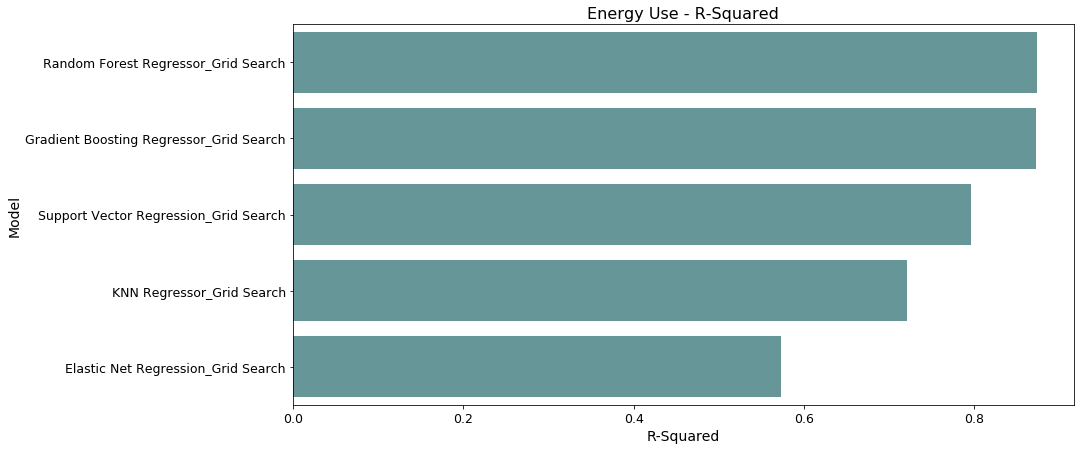

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


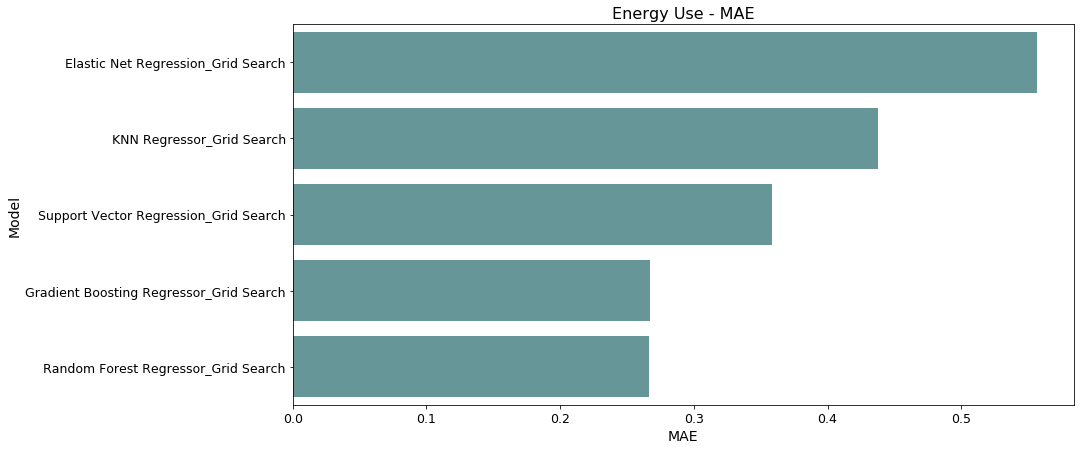

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


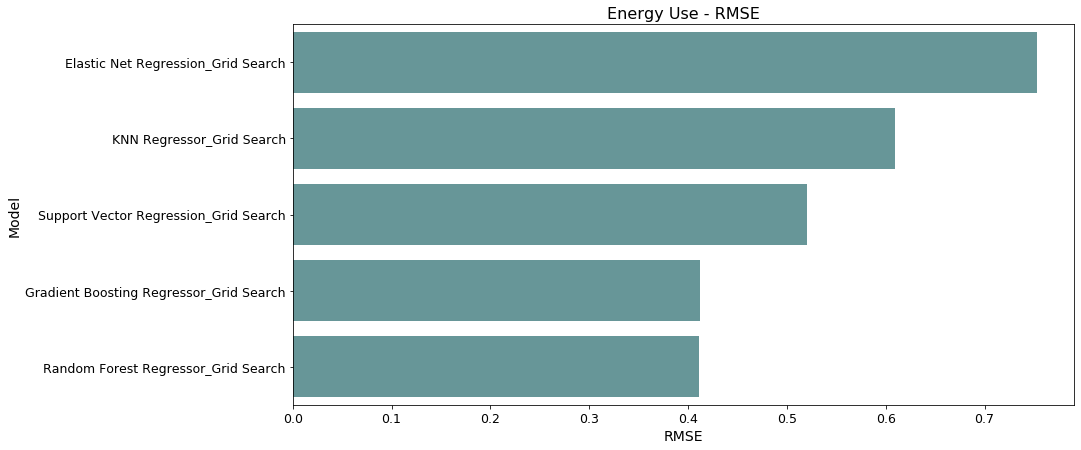

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


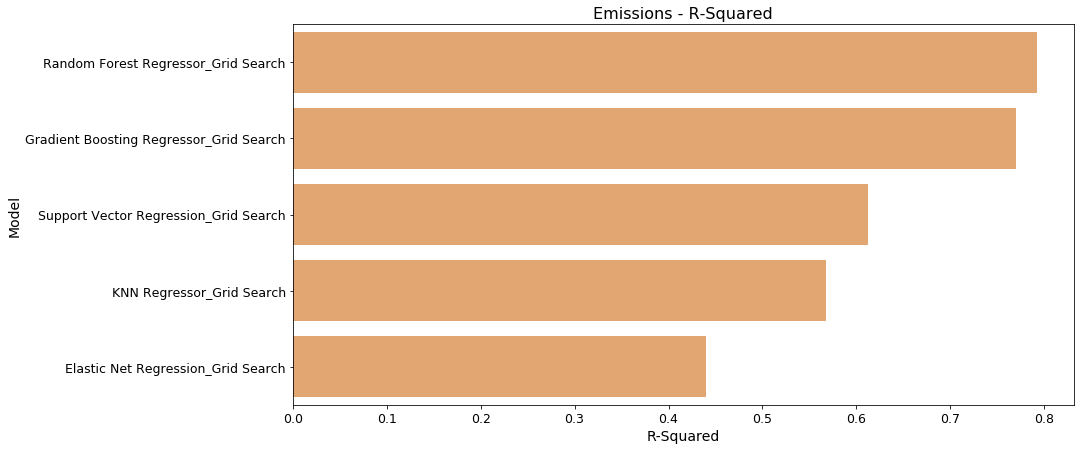

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


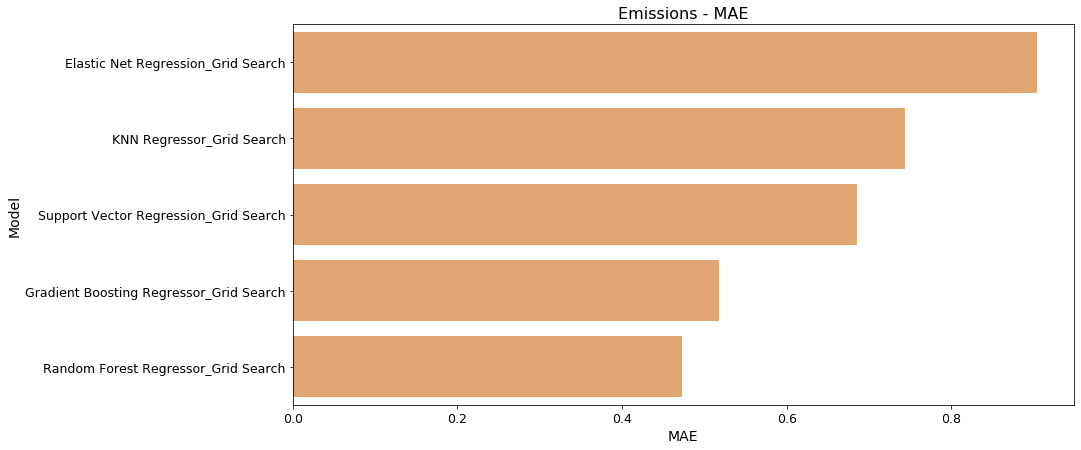

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


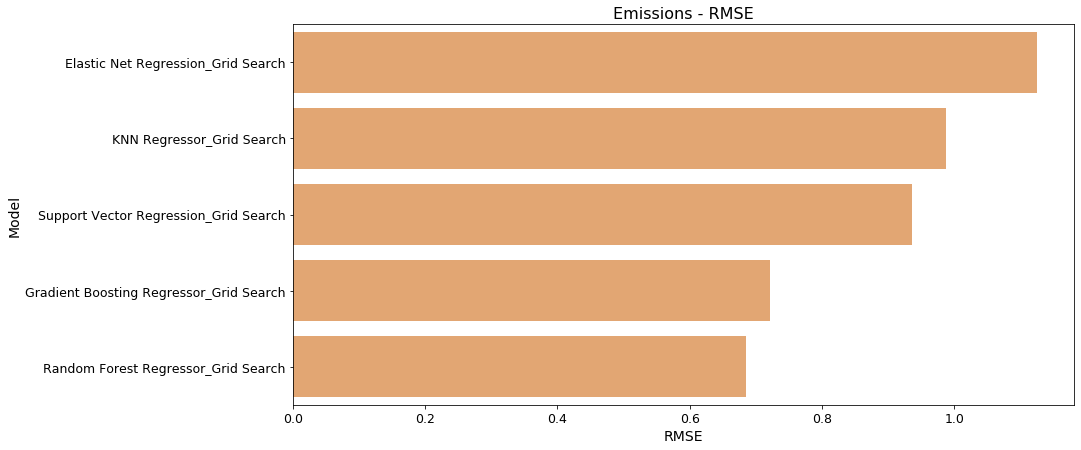

In [58]:
#Bar Charts for all metrics of the Grid Search models
for i in results_gs['Variable'].unique():
    for metric in ['R-Squared', 'MAE', 'RMSE']:
        if i == "Energy Use":
            col = "cadetblue"
        else:
            col ="sandybrown"
        fig, ax = plt.subplots(figsize = (14,7))   
        results_gs.sort_values(metric, ascending = False, inplace = True)
        sns.barplot(x = metric, y ="Model - Final" , data = results_gs[results_gs['Variable'] == i], color = col)
        plt.ylabel("Model", fontsize = 14)
        plt.xlabel(metric, fontsize = 14)
        plt.xticks(fontsize = 12.5)
        plt.yticks(fontsize = 12.5)
        plt.title(i+ " - " + metric, fontsize = 16)
        plt.show()

## Model Selection <br>

Based on the above results, it is clear that the Random Forest Regressor provides the best results. <br>

For the <b>Energy Use</b> variable, we will use this model with the following parameters:<br>
- Max Features: sqrt
- Min Samples Leaf: 1
- N_Estimators: 500

For the <b>Emissions</b> variable, we will use this model with the following parameters:<br>
- Max Features: auto
- Min Samples Leaf: 1
- N_Estimators: 500

### Results
Let's take a look at the scatterplot for the best models

In [59]:
#Variable 1 model with best hyperparameters
rfr = RandomForestRegressor(random_state = 42, max_features= 'sqrt', min_samples_leaf= 1, n_estimators= 500)
model = rfr.fit(X_train, y_train)
pred = model.predict(X_test)

#Variable 2 model with best hyperparameters
rfr2 = RandomForestRegressor(random_state = 42, max_features= 'auto', min_samples_leaf= 1, n_estimators= 500)
rfr_model2 = rfr2.fit(X2_train, y2_train)
pred2 = rfr2.predict(X2_test)

In [60]:
#Results
model_name = "Best Model"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

Best Model: Energy Use 
R-Squared: 0.873 
MAE: 0.267
RMSE: 0.411



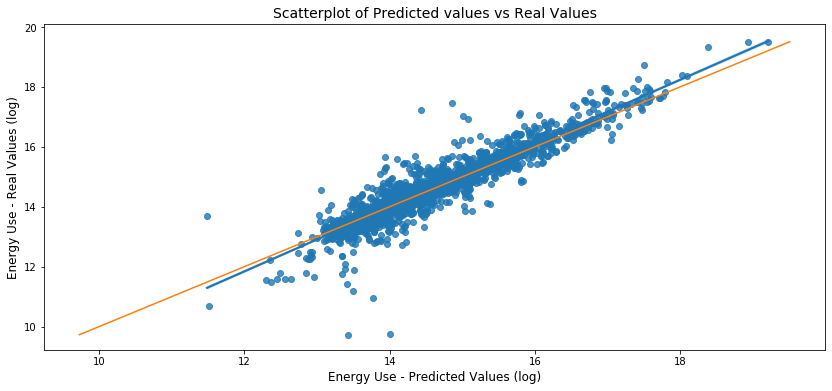

Best Model: Emissions 
R-Squared: 0.792 
MAE: 0.473
RMSE: 0.685


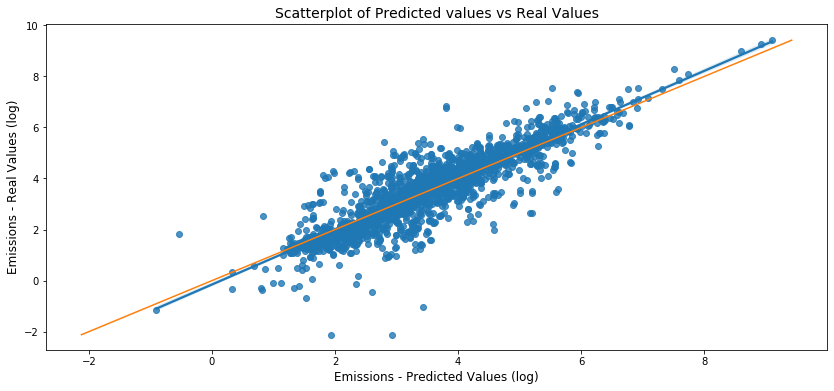

In [61]:
# Scatterplot of real vs predicted values for best model

#Variable 1
sns.regplot(pred, y_test)
sns.lineplot(y_test, y_test)
print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
plt.title("Scatterplot of Predicted values vs Real Values", fontsize = 14)
plt.xlabel("Energy Use - Predicted Values (log)", fontsize = 12)
plt.ylabel("Energy Use - Real Values (log)", fontsize = 12)
plt.show()

#Variable 2
sns.regplot(pred2, y2_test)
sns.lineplot(y2_test, y2_test)
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")
plt.title("Scatterplot of Predicted values vs Real Values", fontsize = 14)
plt.xlabel("Emissions - Predicted Values (log)", fontsize = 12)
plt.ylabel("Emissions - Real Values (log)", fontsize = 12)
plt.show()

Best Model: Energy Use 
R-Squared: 0.789 
MAE: 1438037.883
RMSE: 6430881.597



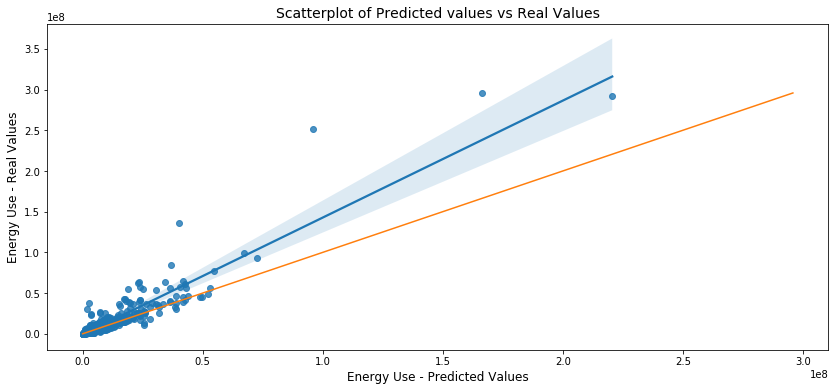

Best Model: Emissions 
R-Squared: 0.867 
MAE: 43.44
RMSE: 166.754


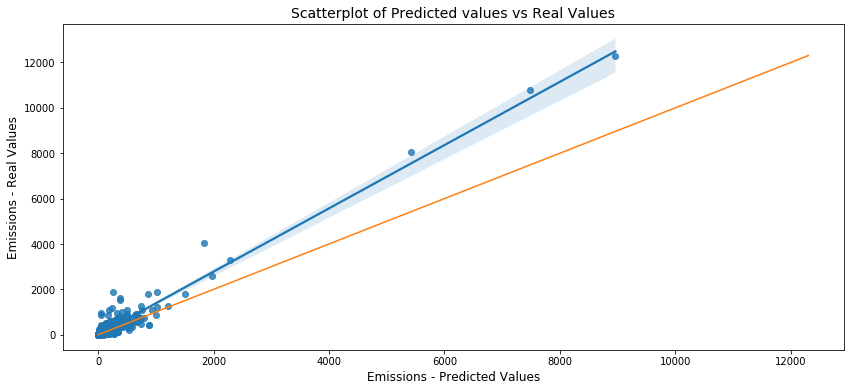

In [62]:
# Scatterplot brought back to real values

#Converting back to real values
pred_real = np.exp(pred)
y_test_real = np.exp(y_test)

pred2_real = np.exp(pred2)
y2_test_real = np.exp(y2_test)

#Results
model_name = "Best Model"

#Variable 1
r2 = r2_score(y_test_real, pred_real)
mae = mean_absolute_error(y_test_real, pred_real)
rmse = (mean_squared_error(y_test_real, pred_real))**0.5

#Variable 2
r2_2 = r2_score(y2_test_real, pred2_real)
mae_2 = mean_absolute_error(y2_test_real, pred2_real)
rmse_2 = (mean_squared_error(y2_test_real, pred2_real))**0.5

#Variable 1
sns.regplot(pred_real, y_test_real)
sns.lineplot(y_test_real, y_test_real)
print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
plt.title("Scatterplot of Predicted values vs Real Values", fontsize = 14)
plt.xlabel("Energy Use - Predicted Values", fontsize = 12)
plt.ylabel("Energy Use - Real Values", fontsize = 12)
plt.show()

#Variable 2
sns.regplot(pred2_real, y2_test_real)
sns.lineplot(y2_test_real, y2_test_real)
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")
plt.title("Scatterplot of Predicted values vs Real Values", fontsize = 14)
plt.xlabel("Emissions - Predicted Values", fontsize = 12)
plt.ylabel("Emissions - Real Values", fontsize = 12)
plt.show()

# Value of Energy Star Score

One of the objectives of the exercise was to determine whether the Energy Star Score can help our predictions. However, as there are fewer observations (5088 vs 6673) with an Energy Star Score, we used a separate dataset to test out the predictions.

## Feature Engineering

Applying the same treatment that we applied to the full dataset.

In [64]:
categorical_cols = X_en.columns[X_en.dtypes==object]
numerical_cols = X_en.select_dtypes(exclude='object').columns

### One-Hot Encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore') #Create encoder
encoding = enc.fit_transform(X_en[categorical_cols]) #Create a data frame with the one-hot encoded values
encoding = encoding.toarray() #Transform the information in the fitted object to an array
enc_df = pd.DataFrame(encoding, columns = enc.get_feature_names()) #Make data frame with one-hot encoded info
X_en = X_en[numerical_cols].join(enc_df) #Re-attach it to the numerical

### Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_en[numerical_cols] = scaler.fit_transform(X_en[numerical_cols])

In [67]:
X_en

,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,Latitude,Longitude,x0_Campus,x0_Multifamily HR (10+),x0_Multifamily LR (1-4),x0_Multifamily MR (5-9),x0_NonResidential,x0_Nonresidential COS,x0_SPS-District K-12,x1_Educational,x1_Health,x1_Hotel,x1_Industrial,...,x4_Educational,x4_Health,x4_Hotel,x4_Industrial,x4_No Use,x4_Office,x4_Other,x4_Parking,x4_Religious,x4_Residential,x4_Social,x5_Educational,x5_Health,x5_Hotel,x5_Industrial,x5_No Use,x5_Office,x5_Other,x5_Parking,x5_Religious,x5_Residential,x5_Social,x6_HIGH OUTLIER,x6_LOW OUTLIER,x6_NA
0,-0.994121,1.204279,-1.321928,-0.08596,1.218265,-0.045827,-0.294882,0.024292,0.070048,-0.349058,-0.132782,-0.107235,-0.272926,-0.119072,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.994121,1.204279,0.827611,-0.08596,1.043412,0.054682,0.146468,0.024813,0.032879,0.033447,0.239166,-0.625631,-0.253979,0.050124,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.994121,1.204279,-0.013513,-0.08596,6.288997,5.756502,-0.294882,6.728114,5.528845,2.190140,-0.132782,-1.847565,-0.248948,-0.108206,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.994121,1.204279,-1.353081,-0.08596,0.868559,-0.225924,-0.294882,-0.183786,-0.151255,-0.349058,-0.132782,-2.477046,-0.231009,-0.068438,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.994121,1.204279,0.329167,-0.08596,2.267382,0.163109,0.070175,0.170070,0.355807,1.377825,-0.132782,-0.033178,-0.240558,-0.225784,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5083,1.005914,-1.656528,1.419513,-0.08596,0.344001,0.749257,1.428387,0.491526,0.721267,0.786395,-0.132782,1.188756,-1.357908,-1.767417,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5084,1.005914,-0.702926,1.388360,-0.08596,-0.180558,-0.498745,-0.219293,-0.518794,-0.507558,-0.349058,-0.132782,1.151727,-0.154563,1.182661,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5085,1.005914,1.204279,-0.543110,-0.08596,-0.705116,-0.542484,-0.294882,-0.549530,-0.540247,-0.349058,-0.132782,0.263048,0.213994,-1.477514,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5086,1.005914,-1.179727,-0.293888,-0.08596,-0.705116,-0.530947,-0.294882,-0.536199,-0.526069,-0.349058,-0.132782,0.929557,-1.261889,2.064037,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


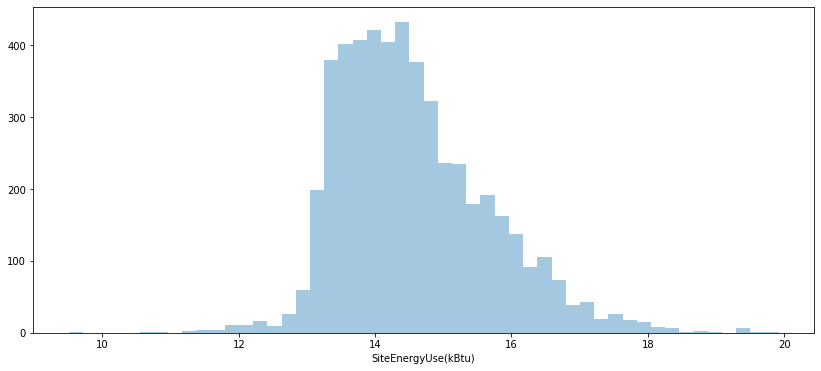

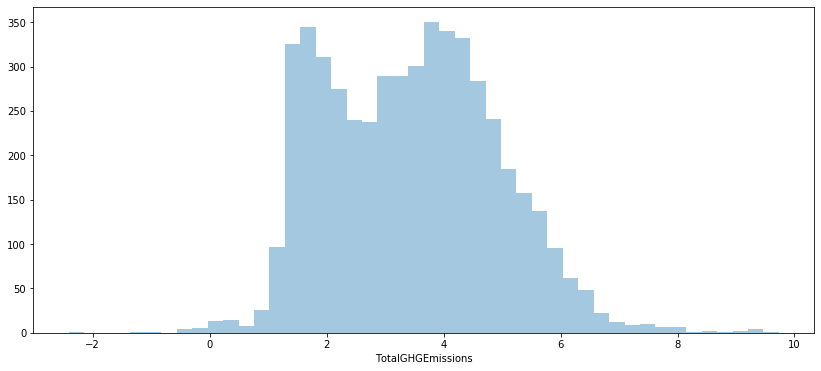

In [68]:
#Converting the target variables to a log scale and visualizing resulting distribution
y_en_log = np.log(y_en)
y2_en_log = np.log(y2_en)
sns.distplot(y_en_log, kde = False)
plt.show()
sns.distplot(y2_en_log, kde = False)
plt.show()

In [69]:
#Creating training and test datasets for Log of Target Variable 1
X_train, X_test, y_train, y_test = train_test_split(X_en, y_en_log, test_size=0.3, random_state = 42)

# Log of Variable 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X_en, y2_en_log, test_size=0.3, random_state = 42)

In [70]:
#Cross-Validated Grid Search
rfr = RandomForestRegressor(random_state = 42)

parameters = {
    'n_estimators': [100,300,500], #Number of trees in the forest
    'min_samples_leaf' : [1,3,5], #Minimum number of samples that a leaf can have after splitting.
    'max_features': ['auto', 'sqrt'] #Max number of features provided to each tree
    #Did not look at other parameters because they were either based on performance gain or did not provide much performance gain
    
}

rfr_search = GridSearchCV(estimator = rfr,
                        param_grid = parameters,
                        cv = 5,
                        verbose = 3,
                        n_jobs = -1
                       )

#Variable 1
rfr_search.fit(X_train, y_train)
pred = rfr_search.predict(X_test)
print(rfr_search.best_params_)

#Variable 2
rfr_search.fit(X2_train, y2_train)
pred2 = rfr_search.predict(X2_test)
print(rfr_search.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   49.9s finished


{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 300}
Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   48.9s finished


{'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 500}


In [71]:
#Results
model_name = "Best Model"

#Variable 1
r2 = r2_score(y_test, pred)
mae = mean_absolute_error(y_test, pred)
rmse = (mean_squared_error(y_test, pred))**0.5

#Variable 2
r2_2 = r2_score(y2_test, pred2)
mae_2 = mean_absolute_error(y2_test, pred2)
rmse_2 = (mean_squared_error(y2_test, pred2))**0.5

Best Model: Energy Use 
R-Squared: 0.917 
MAE: 0.203
RMSE: 0.321



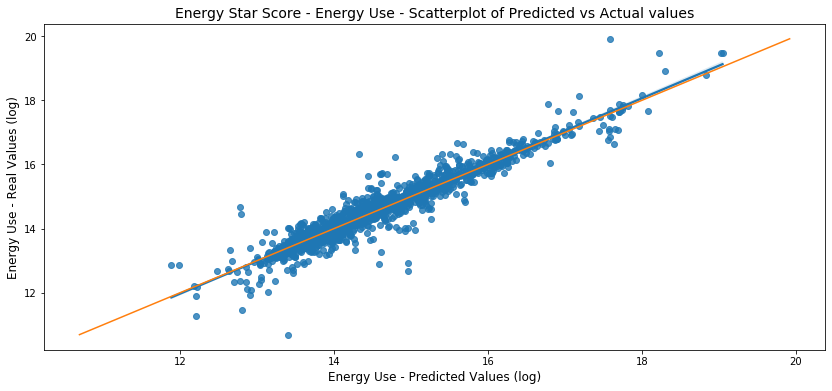

Best Model: Emissions 
R-Squared: 0.81 
MAE: 0.45
RMSE: 0.636


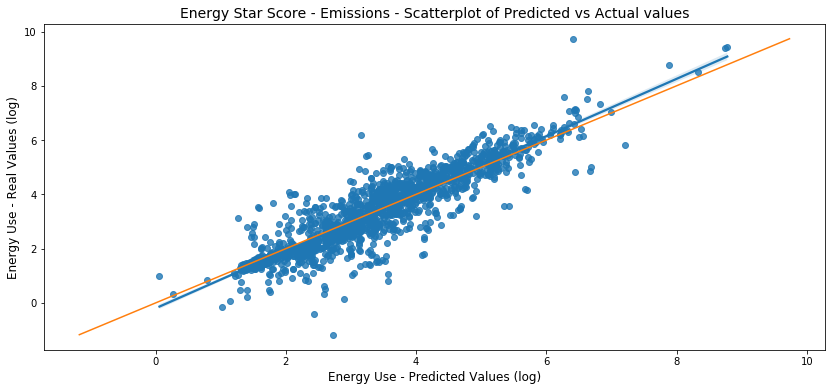

In [72]:
# Scatterplot of real vs predicted values for best model

#Variable 1
sns.regplot(pred, y_test)
sns.lineplot(y_test, y_test)
print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
plt.title("Energy Star Score - Energy Use - Scatterplot of Predicted vs Actual values", fontsize = 14)
plt.xlabel("Energy Use - Predicted Values (log)", fontsize = 12)
plt.ylabel("Energy Use - Real Values (log)", fontsize = 12)
plt.show()

#Variable 2
sns.regplot(pred2, y2_test)
sns.lineplot(y2_test, y2_test)
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")
plt.title("Energy Star Score - Emissions - Scatterplot of Predicted vs Actual values", fontsize = 14)
plt.xlabel("Energy Use - Predicted Values (log)", fontsize = 12)
plt.ylabel("Energy Use - Real Values (log)", fontsize = 12)
plt.show()

Best Model: Energy Use 
R-Squared: 0.565 
MAE: 1425022.026
RMSE: 12626120.574



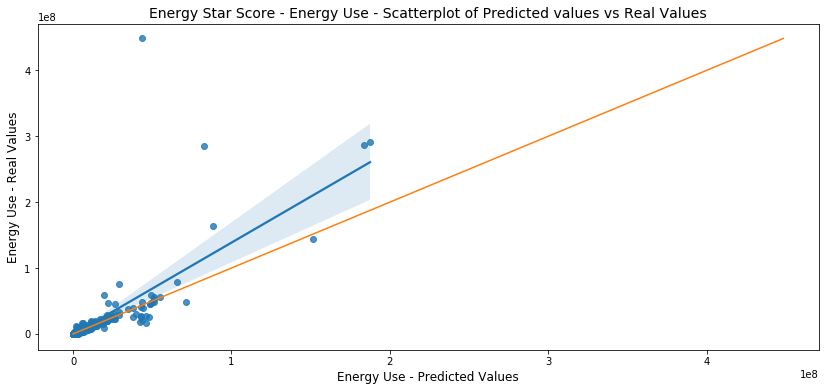

Best Model: Emissions 
R-Squared: 0.464 
MAE: 54.425
RMSE: 484.991


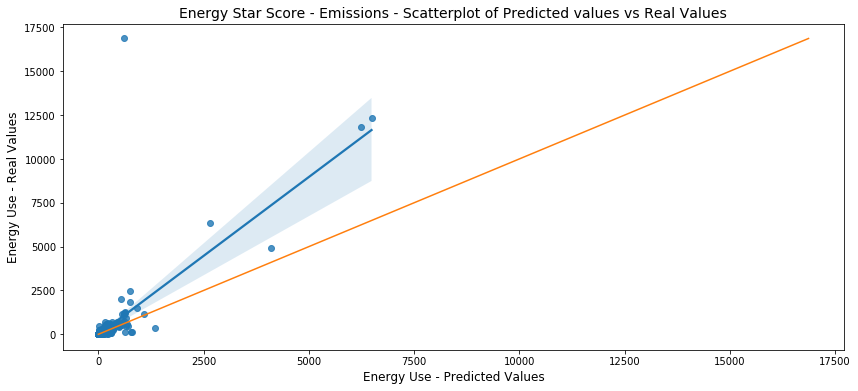

In [73]:
# Scatterplot brought back to real values
pred_real = np.exp(pred)
y_test_real = np.exp(y_test)

pred2_real = np.exp(pred2)
y2_test_real = np.exp(y2_test)

#Results
model_name = "Best Model"

#Variable 1
r2 = r2_score(y_test_real, pred_real)
mae = mean_absolute_error(y_test_real, pred_real)
rmse = (mean_squared_error(y_test_real, pred_real))**0.5

#Variable 2
r2_2 = r2_score(y2_test_real, pred2_real)
mae_2 = mean_absolute_error(y2_test_real, pred2_real)
rmse_2 = (mean_squared_error(y2_test_real, pred2_real))**0.5

#Variable 1
sns.regplot(pred_real, y_test_real)
sns.lineplot(y_test_real, y_test_real)
print(f"{model_name}: Energy Use \nR-Squared: {round(r2,3)} \nMAE: {round(mae,3)}\nRMSE: {round(rmse,3)}\n")
plt.title("Energy Star Score - Energy Use - Scatterplot of Predicted values vs Real Values", fontsize = 14)
plt.xlabel("Energy Use - Predicted Values", fontsize = 12)
plt.ylabel("Energy Use - Real Values", fontsize = 12)
plt.show()

#Variable 2
sns.regplot(pred2_real, y2_test_real)
sns.lineplot(y2_test_real, y2_test_real)
print(f"{model_name}: Emissions \nR-Squared: {round(r2_2,3)} \nMAE: {round(mae_2,3)}\nRMSE: {round(rmse_2,3)}")
plt.title("Energy Star Score - Emissions - Scatterplot of Predicted values vs Real Values", fontsize = 14)
plt.xlabel("Energy Use - Predicted Values", fontsize = 12)
plt.ylabel("Energy Use - Real Values", fontsize = 12)
plt.show()

In [82]:
#Returning the importance of the different features
coefficients = abs(rfr_search.best_estimator_.feature_importances_)

In [83]:
#Linking the different features with their level of importance

important_features = pd.concat([pd.DataFrame(X_en.columns, columns = ['Variable']),pd.DataFrame(coefficients, columns = ['Coefficient'])],axis = 1).sort_values(by = 'Coefficient', ascending = False)

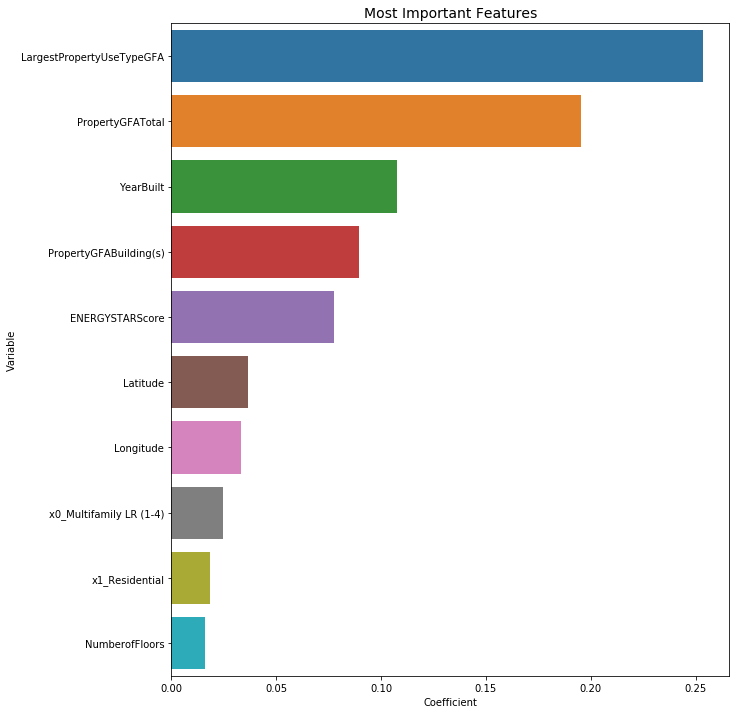

In [84]:
#Displaying the importance of the different features
fig, ax = plt.subplots(figsize = (10,12))
sns.barplot(y = 'Variable', x = 'Coefficient', data = important_features.head(10))
plt.title("Most Important Features", fontsize = 14)
plt.show()

We see that the Energy Star Score enters the top 5 of most important features when it is included, suggesting that it is a strong feature in terms of its predictive power.

## Conclusions

The model that we generated has a good performance, especially for frequent/regular buildings. The performance does suffer for buildings with a very high energy consumptions such as hospitals.<br>

The Energy Score provides a slight improvement to our models on a log scale (0.05 R2 points for the Energy Use model and 0.01 points for the Emissions model) but suffers strongly from buildings with a high energy consumption when the values are returned to the original scale. <br>

For further improvements and going further with the model, I would recommend the following:
- Try generating separate models for different building categories, this could, for example, be based on the primary use of the building.
- Try keeping hospitals as a separate category from the rest of the health sector
- Try fitting the models while keeping only the best features (removing noise)
- Make a composite model that takes input from different models created here (for example Gradient Boosting, which also had a strong performance)
